In [72]:
import matplotlib.pyplot as plt 
import datetime
import numpy as np
from datetime import timedelta  
from statsmodels.tsa.ar_model import AR
from random import random
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm

In [73]:
# get the data
inp = [1339, 1462, 1702, 1656, 1439, 1208, 1613, 1935, 1964, 2003, 2023, 1559, 1274, 1805, 2051, 2024, 2049, 1998, 1441, 1257, 1559, 1643, 1464, 1521, 1576, 1381, 1372, 1610, 1926, 2018, 1930, 1868, 1551, 1471, 1954, 2079, 2061, 2001, 2031, 1574, 1165, 1366, 1384, 1342, 1543, 1509, 1598, 1349, 1625, 1932, 2079, 1857, 1443, 1332, 1149, 1471, 1595, 1498, 1433, 1401, 1178, 972, 1283, 1468, 1456, 1466, 1378, 1208, 1038, 1344, 1379, 1418, 1466, 1414, 1129, 948, 1285, 1373, 1379, 599, 614, 850, 672, 747, 732, 834, 996, 900, 792, 688, 781, 696, 834, 1026, 974, 1001, 997, 1110, 1212, 1301, 1322, 1253, 935, 857, 1082, 1112, 1291, 1391, 1384, 1089, 963, 1174, 1420, 1349, 1338, 1335, 1075, 952, 1376, 1586, 1571, 1543, 1525, 1223, 1066, 1555, 1704, 1745, 1749, 1687, 1288, 1152, 1492, 1728, 1742, 1732, 1510, 1288, 1280, 1659, 1852, 1823, 1723, 1416, 1187, 1014, 1324, 1618, 1736, 1552, 1598, 1158, 1083, 1383, 1595, 1540, 1551, 1447, 1128, 1057, 1371, 1746, 1653, 1726, 1759, 1297, 1165, 1480, 1693, 1744, 1661, 1575, 1199, 1062, 1395, 1555, 1441, 1399, 1381, 1287, 1151, 1394, 1660, 1761, 1874, 1863, 1544, 1340, 1707, 1983, 1785, 1725, 1765, 1520, 1274, 1763, 1793, 1853, 1861, 1733, 1575, 1304, 1793, 1886, 1832, 1993, 1805, 1521, 1332, 1813, 1833, 1633, 1682, 1699, 1392, 1249, 1601, 1827, 1755, 1560, 1181, 1039, 920, 1106, 1269, 1159, 1192, 1203, 1876, 1065, 1294, 1249, 1145, 1098, 1171, 996, 807, 1081, 1258, 1201, 1273, 1165, 944, 797, 948, 1160, 1387, 1364, 1061, 916, 901, 1047, 1107, 1234, 1290, 1027, 877, 629, 789, 977, 953, 983, 927, 870, 724, 824, 1015, 1062, 962, 1046, 766, 764, 876, 975, 917, 914, 1239, 1000, 753, 892, 1000, 1509, 1183, 955, 862, 659, 780, 916, 1010, 988, 1032, 856, 729, 917, 1038, 1146, 1228, 1210, 939, 913, 1045, 1131, 1076, 1068, 1073, 919, 809, 963, 1095, 1150, 950, 909, 889, 840, 1156, 1221, 1247, 1146, 1142, 969, 912, 1103, 1146, 1118, 1193, 1200, 1065, 908, 1491, 1968, 2100, 2402, 2489, 2110, 2046, 2288, 2835, 2620, 2467, 2262, 2046, 1711, 1960, 2241, 2383, 2463, 2289, 1847, 1654, 2040, 2473, 2492, 2501, 2566, 2284, 2063, 2655, 2878, 2957, 2710, 2526, 2105, 1782, 2242, 2520, 2246, 2378, 2545, 2154, 2022, 2711, 3142, 2952, 2882, 2766, 2104, 1745, 2043, 2495, 2555, 2572, 2723, 2276, 1936, 2472, 2800, 2843, 2670, 2769, 2267, 2213, 2695, 2801, 2608, 2418, 1940, 1610, 1459, 1972, 2292, 2573, 2630, 2448, 2022, 1869, 2313, 2551, 2653, 2595, 2373, 2088, 1954, 2374, 2780, 2674, 2675, 2445, 2095, 1806, 2279, 2639, 2616, 2152, 2055, 1775, 1682, 2151, 2386, 2519, 2381, 2394, 1832, 1729, 1953, 2224, 2164, 2121, 2103, 1693, 1557, 1859, 1884, 1949, 1861, 1727, 1489, 1197, 1385, 1412, 1165, 957, 475, 1301, 1148, 1272, 1333, 983, 1263, 1513, 1510, 1371, 1567, 1814, 1870, 2014, 1923, 1506, 1262, 1342, 1531, 1360, 1526, 1542, 1269, 1175, 1377, 1615, 1578, 1564, 1514, 1261, 1087, 1389, 1736, 1819, 1890, 1652, 1521, 1274, 1592, 1694, 1705, 1869, 1910, 1544, 1341, 1679, 1823, 1845, 1921]

In [74]:
# creat a date-time variable
dayone = datetime.datetime(2012, 10, 1, 18, 00)
dates = []
for i,v in enumerate(inp):
    dates.append(dayone+timedelta(days=i))

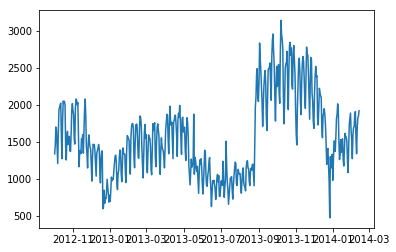

In [75]:
series = pd.Series(inp,index=dates)
series = series.asfreq('d')
plt.plot(series)

In [76]:
# split in train and test
train = series[0:-30]
test = series[-30:]

# reference point in time
start_train = train.index[0]

In [77]:
# define evaluation function
def eval_performance(y,y_hat):
    return(sum(abs(np.true_divide(y-y_hat)/y))*100)

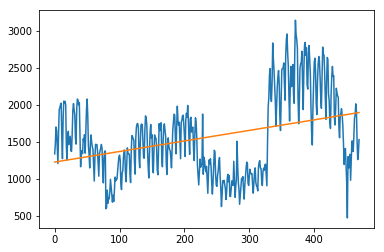

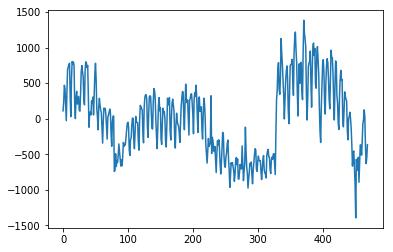

In [78]:
from sklearn.linear_model import LinearRegression

# calculate trend with linear model
# detrend the data
X = [i for i in range(0, len(train))]
X = np.reshape(X, (len(X), 1))
y = train.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(train))]
# plot detrended
plt.plot(detrended)
plt.show()

# save detrended version
train = pd.Series(detrended,index=train.index)
train = train.asfreq('d')

In [79]:
# define a function to predict from the trend
def pred_from_lin_trend(start_train,test_data,model):
    """strat_train is a datetime_object
    and model a fit linear model;
    test_data is the data to be predicted and has 
    a datetime index (unit is days)
    returns predicted data"""
    
    # calc the distance between start of test and start of train
    start_pred = (test_data.index[0] - start_train).days+1
    
    # get the vector of time steps from which to predict
    x_pred = range(start_pred,start_pred+len(test_data))
    x_pred = np.reshape(x_pred, (len(x_pred), 1))
    
    # predict
    y_pred = model.predict(x_pred)
    
    # return a proper pandas series
    series_pred = pd.Series(y_pred,index=test_data.index)
    series_pred = series_pred.asfreq('d')
    return(series_pred)

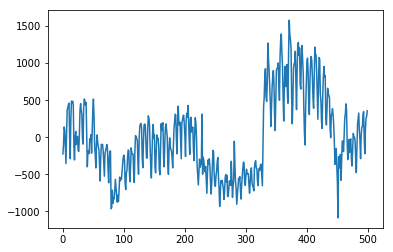

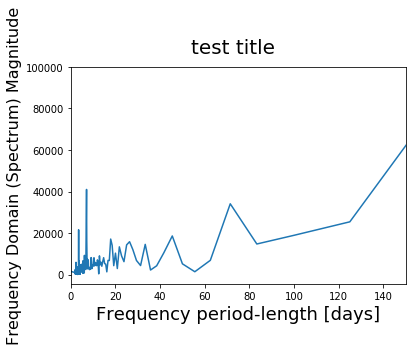

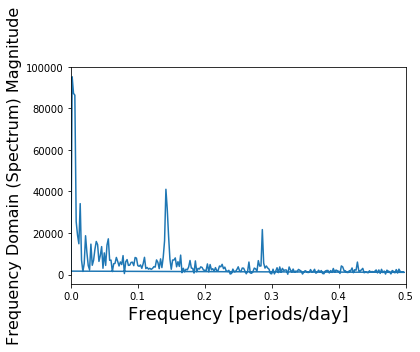

In [80]:
# seasonality check fourier
import scipy.fftpack as fft

# sample_rate
sample_rate = 1 # 1 sample/d


# mean-zero helps, I think
series_fft = series-np.mean(series)
series_fft = series_fft.values
plt.plot(series_fft)
plt.show()

# fourier
series_fft = fft.fft(series_fft)
frqs = fft.fftfreq(len(series_fft)) * sample_rate

# plot it
# have to take abs value because result of DFT
# is real and imaginary (real: correlation with cosine)
# (imaginary: correlation with sine)
# plot at sample_rate/2 (nyquist-frequency)
# so to disregard unuseful harmonics
# only look at positive side
#plt.plot(np.abs(series_fft))

fig = plt.figure()
new_frqs = frqs
series_fft = np.abs(series_fft)
series_fft_plt = series_fft[new_frqs != 0]
new_frqs = new_frqs[new_frqs != 0]
new_frqs = 1/new_frqs

plt.plot(new_frqs, np.abs(series_fft_plt))
fig.suptitle('test title', fontsize=20)
plt.xlabel('Frequency period-length [days]', fontsize=18)
plt.ylabel('Frequency Domain (Spectrum) Magnitude', fontsize=16)
plt.xlim(0, 150)
#plt.ylim(-5, 110)
plt.show()

# normal freq plot
plt.plot(frqs, series_fft)
fig.suptitle('test title', fontsize=20)
plt.xlabel('Frequency [periods/day]', fontsize=18)
plt.ylabel('Frequency Domain (Spectrum) Magnitude', fontsize=16)
plt.xlim(0, sample_rate / 2)
#plt.ylim(-5, 110)
plt.show()


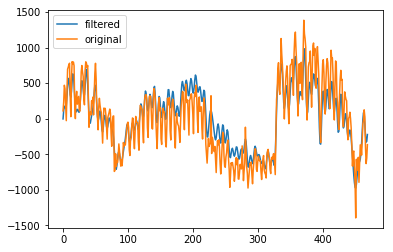

In [81]:
# denoise the signal
# min yearly signal (lowest possible)
# max weekly fluctuations (highest possible)
from scipy import signal

fs = 1 # sampling rate: 1 sample per day
fc = [0.0027, 0.143]  # Cut-off frequency of the filter
w = np.true_divide(fc, (fs / 2)) # Normalize the frequency
signalc = train.values
b, a = signal.butter(5, w, 'band')
filtered = signal.filtfilt(b, a, signalc)


plt.plot(filtered, label='filtered')
plt.plot(signalc,label='original')
plt.legend()
plt.show()

# save filtered version
train = pd.Series(filtered,index=train.index)
train = train.asfreq('d')

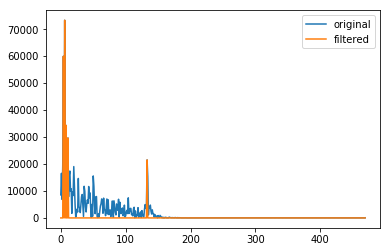

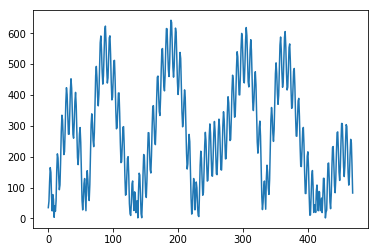

In [92]:
# now get only the important cycles
import scipy
C = fft.rfft(train.values)
F = abs(C)
plt.plot(F, label='original')
Yf = scipy.zeros(len(F))
Yf[F>20000] = F[F>20000]
plt.plot(Yf, label='filtered')
plt.legend()
plt.show()

# reconstruct
C[F<=20000] = 0
r = abs(fft.irfft(C))
plt.plot(r)

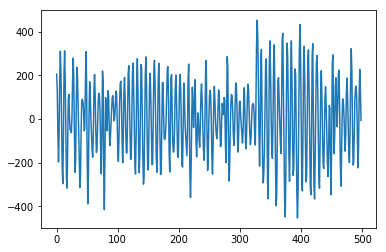

In [154]:
# check the steep increase
plt.plot(np.diff(series_c))

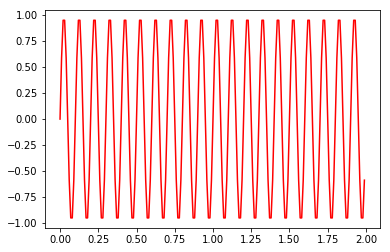

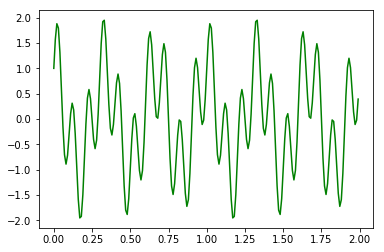

(-5, 110)

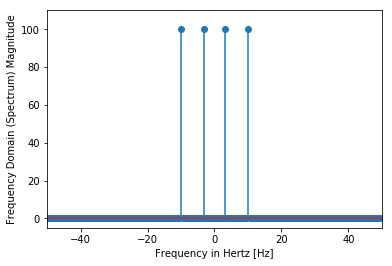

In [155]:
import numpy as np

# Get x values of the sine wave
sample_rate = 100 # Hz
len_rec = 2 # seconds
time = np.linspace(0,len_rec,len_rec*sample_rate,endpoint=False)
n_samples = len(time)


# frequencies
freq_1 = 3 # Hz
freq_2 = 10 # Hz
freq_3 = 0.01 # Hz

# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.cos(time*2*freq_1*np.pi) # 1Hz
amplitude_2 = np.sin(time*2*freq_2*np.pi) # 10Hz
amplitude_3 = np.sin(time*2*freq_3*np.pi) # 0.01Hz

# Plot a sine wave using time and amplitude obtained for the sine wave
#plt.plot(time, amplitude,'b')
plt.plot(time, amplitude_2,'r')
#plt.plot(time, amplitude_3,'g')
plt.show()

# compound data
d = amplitude + amplitude_2 #+ amplitude_3
plt.plot(time, d,'g')
plt.show()

# fourier
series_fft = fft.fft(d)
frqs = fft.fftfreq(len(d)) * sample_rate

# plot it
# have to take abs value because result of DFT
# is real and imaginary (real: correlation with cosine)
# (imaginary: correlation with sine)
# plot at sample_rate/2 (nyquist-frequency)
# so to disregard unuseful harmonics
# only look at positive side
fig, ax = plt.subplots()

ax.stem(frqs, np.abs(series_fft))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-sample_rate / 2, sample_rate / 2)
ax.set_ylim(-5, 110)

In [156]:
# model an AR(1) model
# contrived dataset
# NON_STATIONARY; ARMA ARE HOWEVER STATIONARY MODELS (WHEN CORR < 1 and pos)
data = [x + random()*10 for x in range(1, 100)]
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data)+100)
print(yhat)

[106.67354938 105.31833568 107.74826562 109.62536603 110.25053891
 109.81631111 112.1694519  114.01749116 112.64406785 115.4611824
 116.65436628 117.06511538 118.44512455 119.75570276 121.00531827
 121.26962495 122.98018691 124.31023566 124.6375793  126.35175447
 127.40423895 128.40375061 129.49080763 130.69418925 131.94782124
 132.69817097 134.10266136 135.26153775 136.15831803 137.48244484
 138.56428661 139.71779418 140.78877063 141.97841572 143.1777024
 144.17120919 145.43782861 146.57221443 147.66505875 148.86972639
 149.99948841 151.18296927 152.29555129 153.48674671 154.66633953
 155.77616162 156.99135794 158.14499696 159.308067   160.49073602
 161.65808387 162.85088354 164.00627555 165.20501687 166.3909167
 167.55919846 168.76495703 169.9461323  171.14088163 172.33425273
 173.52978653 174.7350344  175.92515015 177.13686374 178.34069758
 179.54361847 180.7590219  181.96678283 183.18363737 184.39753928
 185.61677339 186.839517   188.05808956 189.28704954 190.51281625
 191.74167987

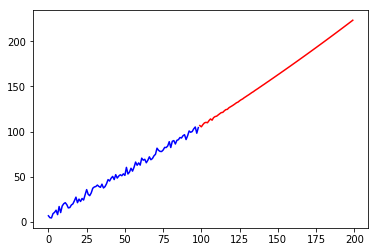

In [157]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data),len(data)+len(yhat)))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [158]:
# model a MA model
# moving average model IS NOT a moving average of the time series
# The moving average (MA) method models the next step in the
# sequence as a linear function of the residual errors from a
# mean process at prior time steps. 
# different from AR(1) the autocorrelation function will fall
# steeply after lag h of MA(h)

# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [x + random()*10 for x in range(1, 100)]
# fit model (disp is verbosity for model fitting)
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+100)
print(yhat)

[80.19420818 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835 55.11123835
 55.11123835 55.11123835 55.11123835 55.11123835 55

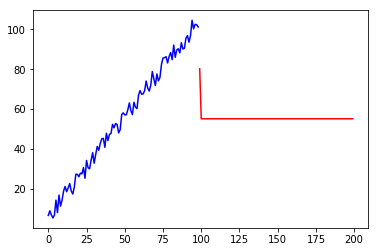

In [159]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data),len(data)+len(yhat)))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [161]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [random() for x in range(1, 100)]
data = [random()*10 for x in range(1, 100)]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+100)
print(yhat)

[4.57494741 4.41831368 4.59492006 4.42662194 4.5868281  4.434326
 4.57949451 4.44130693 4.57284928 4.4476326  4.5668278  4.45336452
 4.56137152 4.45855841 4.55642739 4.46326478 4.55194735 4.46752939
 4.54788781 4.4713937  4.54420933 4.4748953  4.54087612 4.47806821
 4.53785579 4.48094331 4.53511895 4.48354853 4.53263901 4.48590922
 4.53039184 4.48804832 4.52835561 4.48998664 4.5265105  4.49174301
 4.52483859 4.49333453 4.52332361 4.49477666 4.52195083 4.49608342
 4.5207069  4.49726753 4.51957974 4.49834049 4.51855838 4.49931274
 4.51763288 4.50019372 4.51679426 4.50099202 4.51603435 4.50171538
 4.51534578 4.50237085 4.51472183 4.50296479 4.51415645 4.50350298
 4.51364414 4.50399065 4.51317992 4.50443255 4.51275927 4.50483297
 4.51237811 4.5051958  4.51203272 4.50552458 4.51171976 4.5058225
 4.51143617 4.50609245 4.5111792  4.50633706 4.51094634 4.50655872
 4.51073535 4.50675956 4.51054416 4.50694156 4.51037092 4.50710647
 4.51021393 4.50725591 4.51007169 4.50739131 4.50994279 4.5075140

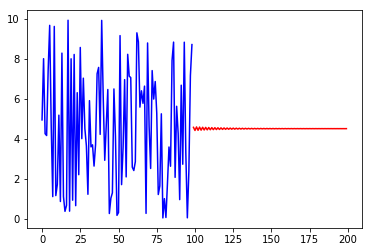

In [162]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data),len(data)+len(yhat)))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [163]:
# ARIMA
# The Autoregressive Integrated Moving Average (ARIMA)
# method models the next step in the sequence as a linear
# function of the differenced observations and residual
# errors at prior time steps.

# It combines both Autoregression (AR) and Moving Average (MA)
# models as well as a differencing pre-processing step of the
# sequence to make the sequence stationary, called integration (I).
# differencing can be down d amounts of time

from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = [x + random()*20 for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
# typ levels helps here to predict in the original data space
# "linear" would be on the preprocessed one (the differenced one)
yhat = model_fit.predict(len(data)-30, len(data)+100, typ='levels')
print(yhat)

[ 79.30217729  80.3930948   81.34831463  82.32097053  83.2826255
  84.31052754  85.37755502  86.46759138  87.52945417  88.46630144
  89.4887665   90.49247025  91.41043421  92.43763641  93.51018966
  94.45081975  95.35085917  96.26790156  97.29323867  98.37377543
  99.37354636 100.31271186 101.22600506 102.21975256 103.19963232
 104.13524269 105.10199913 106.0486366  107.03770431 108.00170147
 108.97968648 109.93250829 110.91088049 111.88914641 112.86741276
 113.84567912 114.82394547 115.80221183 116.78047818 117.75874454
 118.7370109  119.71527725 120.69354361 121.67180996 122.65007632
 123.62834267 124.60660903 125.58487538 126.56314174 127.5414081
 128.51967445 129.49794081 130.47620716 131.45447352 132.43273987
 133.41100623 134.38927258 135.36753894 136.34580529 137.32407165
 138.30233801 139.28060436 140.25887072 141.23713707 142.21540343
 143.19366978 144.17193614 145.15020249 146.12846885 147.10673521
 148.08500156 149.06326792 150.04153427 151.01980063 151.99806698
 152.9763333

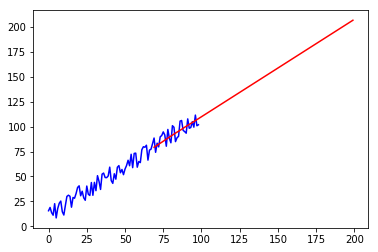

In [164]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data)-30,len(data)+len(yhat)-30))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
plt.show()

In [173]:
len(series_c)

500

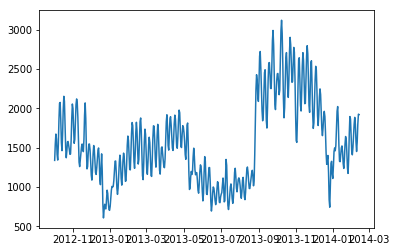

In [174]:
plt.plot(series_c)

In [178]:
# let's turn to our data
# fit model
model = ARIMA(series_c, order=(1, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
# typ "levels" helps here to predict in the original data space
start = series_c.index[-200] 
stop = series_c.index[-1] + timedelta(days=100) 

#print(start)
#print(stop)
yhat = model_fit.predict(start, stop, typ='levels')
print(yhat[0:10])

#help(model_fit.predict)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

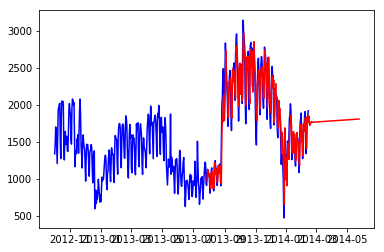

In [123]:
# plot the original data and the modeled data
plt.plot(series, 'b') # plotting t, a separately
#inds = np.array(range(len(series)-30,len(series)+len(yhat)-30))
plt.plot(yhat, 'r') # plotting t, b separately 
plt.show()

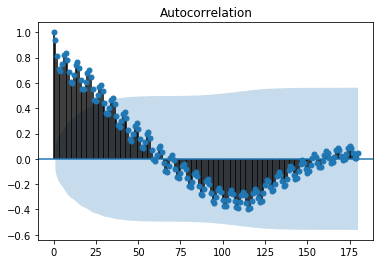

In [179]:
# check the acf function
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series_c, lags=180)
plt.show()

In [183]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# fit model
# seasonal order (last one) is period length
model = SARIMAX(series_c, order=(1, 1, 1), seasonal_order=(0, 1, 0, 60),enforce_invertibility=False)
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start, stop)
print(yhat[0:10])

ModuleNotFoundError: No module named 'sklearn'

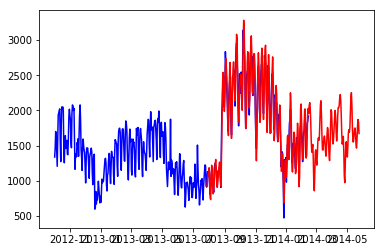

In [182]:
# plot the original data and the modeled data
plt.plot(series, 'b') # plotting t, a separately
#inds = np.array(range(len(series)-30,len(series)+len(yhat)-30))
plt.plot(yhat, 'r') # plotting t, b separately 
plt.show()

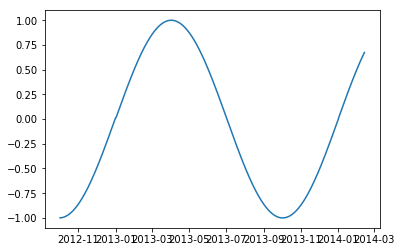

In [174]:
# for multiple seasonal effects we need exogeneous data
# here simply the seasonality as fourier components
# prepare Fourier terms
exog = pd.DataFrame(series)
exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)
exog_to_train = exog.iloc[:(len(series)-365)]
exog_to_test = exog.iloc[(len(series)-365):]